# DATA ANALYSE

## Nettoyage des données

### Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [2]:
df = pd.read_csv('../csv/donnees.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Valeurs manquantes

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Doublons

In [4]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [5]:
df.drop_duplicates(inplace=True)

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Données érronnées

In [6]:
df['age'].unique().dtype

dtype('int64')

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['bmi'].unique().dtype

dtype('float64')

In [9]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [10]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
df['charges'].unique().dtype

dtype('float64')

### Valeurs Abérrantes

In [13]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


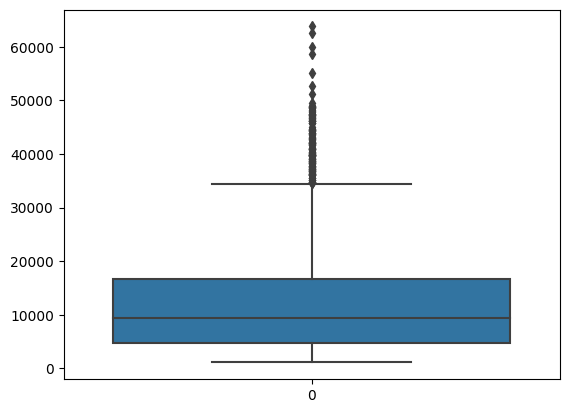

In [14]:
sns.boxplot(df['charges'])
plt.show()

In [15]:
test = df[df['charges']>35000]

test

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [16]:
test['smoker'].value_counts()

yes    130
no       3
Name: smoker, dtype: int64

In [17]:
test[test['smoker'] == 'no']

,age,sex,bmi,children,smoker,region,charges
242,55,female,26.80,1,no,southwest,35160.13457
1012,61,female,33.33,4,no,southeast,36580.28216
1206,59,female,34.80,2,no,southwest,36910.60803


In [18]:
masques = [test['bmi'] > 40, test['age'] > 50, test['children'] != 0]

combo_mask = masques[0]

for masque in masques:
    combo_mask += masque

test2 = test[combo_mask]

test.drop(test2.index, axis=0)

,age,sex,bmi,children,smoker,region,charges
19,30,male,35.300,0,yes,southwest,36837.46700
30,22,male,35.600,0,yes,southwest,35585.57600
53,36,male,34.430,0,yes,southeast,37742.57570
158,30,male,35.530,0,yes,southeast,36950.25670
161,18,female,36.850,0,yes,southeast,36149.48350
203,27,female,36.080,0,yes,southeast,37133.89820
254,50,male,31.825,0,yes,northeast,41097.16175
263,19,male,36.955,0,yes,northwest,36219.40545
322,34,male,30.800,0,yes,southwest,35491.64000
441,33,female,33.500,0,yes,southwest,37079.37200


In [19]:
df.to_csv('../csv/donnees_clean.csv')